<a href="https://colab.research.google.com/github/The-Basit-Nazeer/Malaria-parasite-detection-using-deep-learning-algorithms-based-on-CNNs-technique/blob/main/Malariagit96_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'Courier New'> Detection Of Malarial Infected Cells Using Convolutional Neural Networks</font>

##  <font color = 'Blue'> Importing the Libraries and Packages <font/>

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
#drive.mount('/content/drive/MyDrive/Colab_Notebooks/Dataset/cell_images/')
#os.listdir()
#%cd /MyDrive/Colab_Notebooks/

Mounted at /content/drive/


In [3]:
path = "/content/drive/MyDrive/Colab_Notebooks/Dataset"
import os
fnames = os.listdir(path)
print(fnames)
%cd /content/drive/MyDrive/Colab_Notebooks/Dataset

['cell_images', 'Malariagit97_final.h5']
/content/drive/MyDrive/Colab_Notebooks/Dataset


# <font color = 'purple'>Training & Testing Data</font>

######  This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

#### Load random sample images :

/content/drive/MyDrive/Colab_Notebooks/Dataset


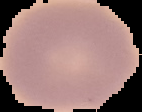

In [4]:
from pathlib import Path

print(Path.cwd())
load_img('cell_images/Uninfected/C1_thinF_IMG_20150604_104919_cell_134.png',)

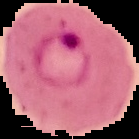

In [5]:
load_img('cell_images/Parasitized/C37BP2_thinF_IMG_20150620_131423a_cell_92.png')

#

# <font color = 'green'>Pre-Processing images</font>

### Data-Augmentation

In [6]:



train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('cell_images/',
                                                 target_size = (64, 64),
                                                 batch_size = 64,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('cell_images/',
                                            target_size = (64, 64),
                                            batch_size = 64,
                                            class_mode = 'binary')

Found 27589 images belonging to 2 classes.
Found 27589 images belonging to 2 classes.


### training_set * batch size
    431 * 64 =27584

In [7]:
len(training_set)

432

In [8]:
len(test_set)

432

#

# <font color = 'Courier New'>CNN Model Architecture</font>

In [9]:
# Initialising the CNN
Model = Sequential()


# Step 1 - Convolution layer 1
Model.add(Conv2D(32, kernel_size =(3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Step 2 - Max Pooling
Model.add(MaxPooling2D(pool_size = (2, 2)))

#step 3 Dropout layers - Regularization technique
Model.add(Dropout(rate=0.2))



# step 4 convolutional layer 2
Model.add(Conv2D(32, kernel_size =(3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Step 5 - Max Pooling
Model.add(MaxPooling2D(pool_size = (2, 2)))

# Step 6 - Dropout
Model.add(Dropout(rate=0.2))



# Step 7 -Convolution layer 3
Model.add(Conv2D(32, kernel_size =(3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

#step 8 Max Pooling
Model.add(MaxPooling2D(pool_size = (2, 2)))

#step 9 Dropout
Model.add(Dropout(rate=0.2))


# Step 10 - Flattening
Model.add(Flatten())

# Step 11 - Full connected neuron layer
Model.add(Dense(units = 256, activation = 'relu'))
Model.add(Dropout(rate=0.2))

Model.add(Dense(units = 128, activation = 'relu'))
Model.add(Dropout(rate=0.2))

Model.add(Dense(units = 1, activation = 'sigmoid'))

In [10]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

#

# <font color = 'Orange'>Compile & Training the Model</font>

In [11]:
Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Early stopping Regularization - To prevent overfitting problem

In [12]:
earlystop= EarlyStopping(monitor='val_accuracy', patience=3)

## Training the Model

In [13]:
history=Model.fit(training_set,batch_size=64,
                         verbose = 1,
                         steps_per_epoch = len(training_set),
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps=len(test_set),
                        callbacks=[earlystop])


Epoch 1/20
432/432 [==============================] - 4052s 9s/step - loss: 0.4746 - accuracy: 0.7477 - val_loss: 0.1567 - val_accuracy: 0.9546
Epoch 2/20
432/432 [==============================] - 435s 1s/step - loss: 0.1652 - accuracy: 0.9490 - val_loss: 0.1475 - val_accuracy: 0.9551
Epoch 3/20
432/432 [==============================] - 487s 1s/step - loss: 0.1544 - accuracy: 0.9528 - val_loss: 0.1360 - val_accuracy: 0.9548
Epoch 4/20
432/432 [==============================] - 484s 1s/step - loss: 0.1514 - accuracy: 0.9534 - val_loss: 0.1244 - val_accuracy: 0.9586
Epoch 5/20
432/432 [==============================] - 442s 1s/step - loss: 0.1420 - accuracy: 0.9564 - val_loss: 0.1389 - val_accuracy: 0.9572
Epoch 6/20
432/432 [==============================] - 499s 1s/step - loss: 0.1377 - accuracy: 0.9568 - val_loss: 0.1254 - val_accuracy: 0.9570
Epoch 7/20
432/432 [==============================] - 445s 1s/step - loss: 0.1346 - accuracy: 0.9560 - val_loss: 0.1213 - val_accuracy: 0.961

In [14]:
s=summary = pd.DataFrame(Model.history.history)
#print( pd.DataFrame(Model.history.history))
s

,loss,accuracy,val_loss,val_accuracy
0,0.474619,0.747726,0.156677,0.954583
1,0.165243,0.948965,0.147486,0.955127
2,0.154386,0.952771,0.136025,0.954765
3,0.151397,0.953387,0.124373,0.958643
4,0.142033,0.956359,0.138921,0.957157
5,0.137711,0.956758,0.125429,0.957048
6,0.134598,0.956033,0.121255,0.961361
7,0.132065,0.956649,0.117443,0.961144
8,0.129497,0.958208,0.117457,0.960926
9,0.130037,0.958462,0.113182,0.962050


# <font color='violet'>Test Accuracy<font/>

In [15]:
print('Test Accuracy : {:.2f}%'.format(Model.evaluate(test_set)[1]*100))

432/432 [==============================] - 160s 370ms/step - loss: 0.1007 - accuracy: 0.9649
Test Accuracy : 96.49%


# Save the Model

In [16]:
Model.save("Malariagit97_final.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# <font color='aqua'>Visualising Model Performance<font/>

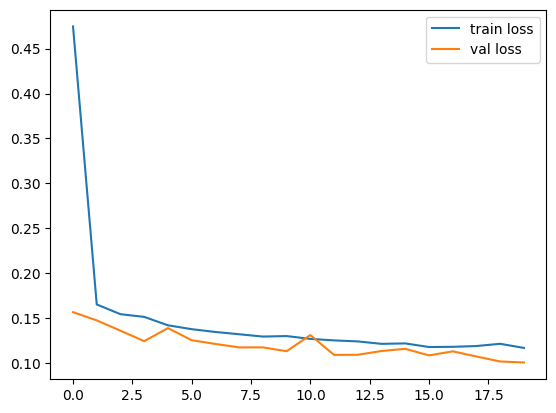

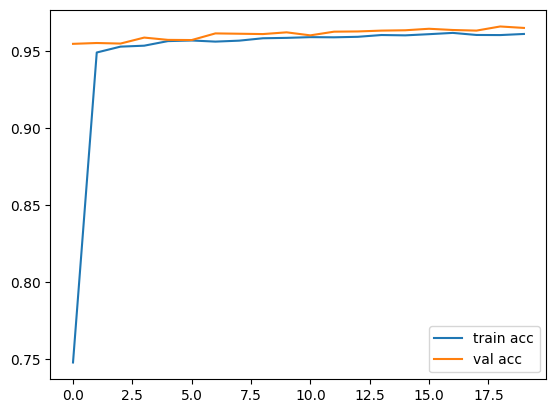

<Figure size 640x480 with 0 Axes>

In [17]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

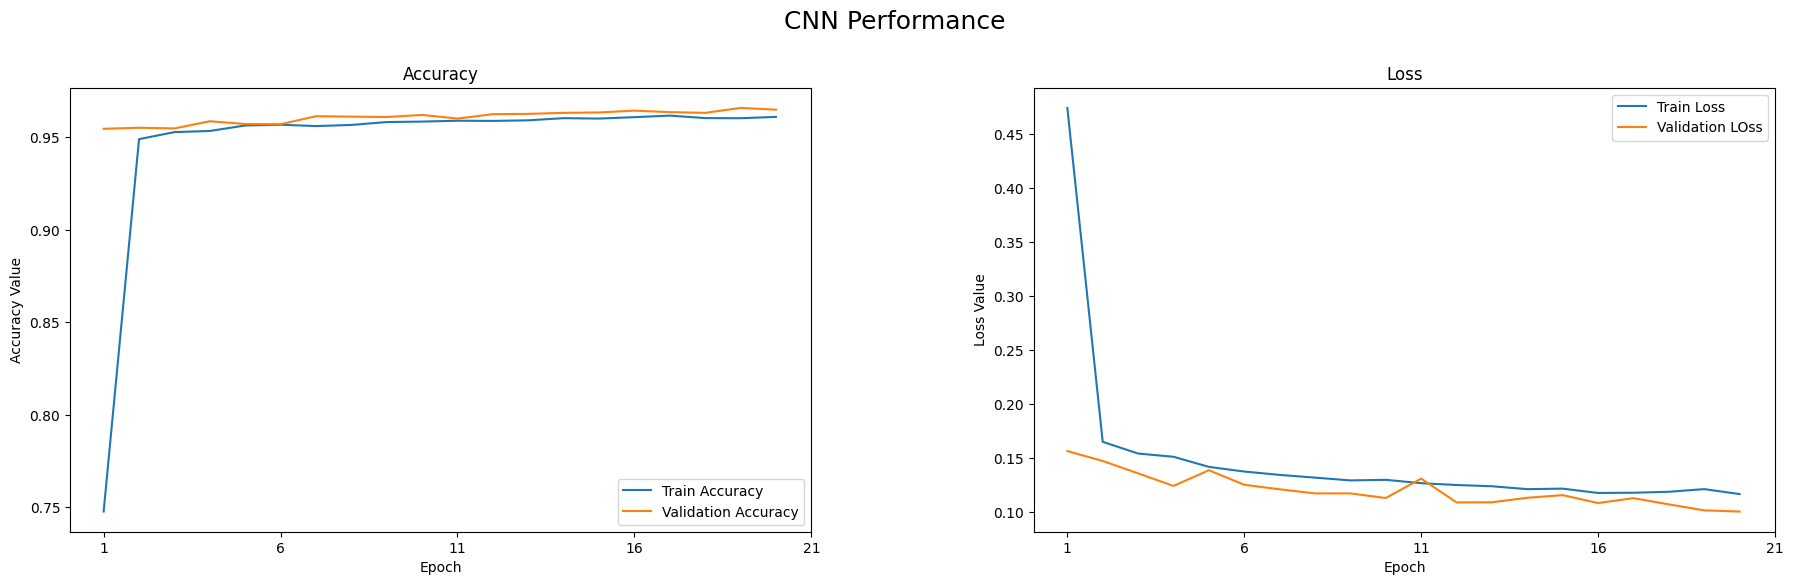

In [18]:
#Plotting Accuracy and loss graph

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 6))
t = f.suptitle('CNN Performance', fontsize=18)
f.subplots_adjust(top=0.85, wspace=0.3)
max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))

ax1.plot(epoch_list, history.history['accuracy'], label = 'Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label = 'Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch + 1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc = "best")

ax2.plot(epoch_list, history.history['loss'], label = 'Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label = 'Validation LOss')
ax2.set_xticks(np.arange(1, max_epoch + 1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc = "best")

# <font color='red'>Predictions with the Model<font/>

In [19]:
Model=load_model("Malariagit97_final.h5")
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

### Loading sample images

In [ ]:
test_image=load_img("cell-images/Uninfected/C1_thinF_IMG_20150604_104722_cell_151.png",target_size=(64,64))

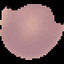

In [ ]:
test_image

In [ ]:
def Predictions(test_image):
    test_image = np.array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = Model.predict(test_image)

    if result[0][0] == 0:
        return 'Parasitized'
    else:
        return 'Uninfected'

In [ ]:
Predictions(test_image)

1/1 [==============================] - 0s 118ms/step


'Uninfected'

#  <center><font color = 'REd'>Thank You ! <font/><center/>